<img src='https://cdn-icons-png.flaticon.com/512/8055/8055576.png' height="100" width="100" style="float:left"><h1 style="display:inline-block">AI Bootcamp :Applied AI for Research</h1>

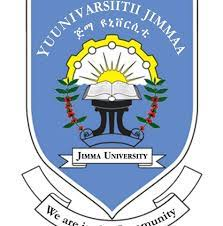
<br><br><br><br><br>
<hr style="border-color:blue">
<div style="display:flex">
<h2 style="display:inline">Image data Pre-processing
<img src='https://miro.medium.com/v2/resize:fit:1400/1*8yTuqsRrXbvM3K0U8m5QPQ.jpeg' height="150" width="150"></h2>
</div>

<hr>
<a target='_blank' href='https://colab.research.google.com/github/mizgithub/AI-bootcamp.git'> <img src='https://colab.research.google.com/assets/colab-badge.svg' alt='Open In Colab'/></a>
<hr>
<img src='images/image_processing_graphics.jpg' style="height:200px"></h2>
</div>

<hr>

<br>
<h3>Topics</h3>
<table style="border:1px solid blue;font-size:14px">
    <tr><td>
        <ul style="text-align:left">
        <li>Reading image</li>
        <li>Resizing and cropping</li>
        <li>Normalization/ intensity scaling</li>
        <li>Data augmentation</li>
        <li>Reading list of images from directory</li>
        <li>Keras Image data generator</li>
        </ul></td>
         </tr>
</table>

### Required packges
`opencv-python` for manipulating image data. Install it using `pip install opencv-python` and to import the package use `import cv2`

You may also need `numpy`. To install it use `pip install numpy` and to import it use `import numpy`

`matplotlib` for displaying and image. Install it usig `pip install matplotlib` and import pyplot function using `import matplotlib.pyplot`

### sample data set used for this practice 
The Dinosaur Dataset <a href="https://www.kaggle.com/datasets/cmglonly/simple-dinosurus-dataset">Simple dinosaue dataset</a>
This dataset is built from 5 classes of dinosaurs. This dataset is for educational purposes only, the dinosaurs that become the dataset is

1. Ankylosaurus
2. Brontosaurus
3. Pterodactyl
4. T-Rex
5. Triceratops

## 1 Reading sample image


In [1]:
## importing neccessary packages
import cv2
import matplotlib.pyplot as plt
import numpy as np

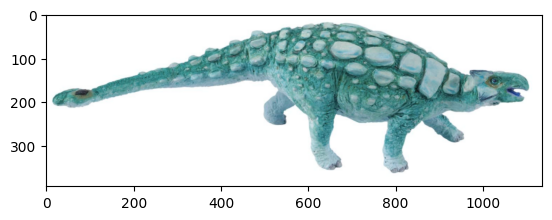

In [2]:
## Read an image using cv2's default color setting, BGR (blue green red)
sample_img = cv2.imread("datasets/sample_image_data/ankylosaurus/1.png")
## display the image
plt.imshow(sample_img)

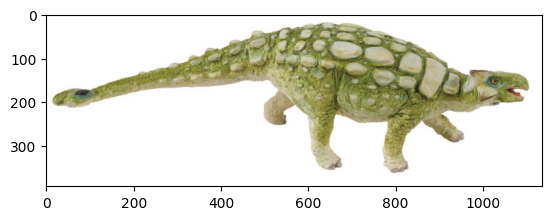

In [3]:
## Read the image using RGB color 
sample_img= cv2.imread("datasets/sample_image_data/ankylosaurus/1.png")
## display the image
sample_img_rgb = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
plt.imshow(sample_img_rgb)

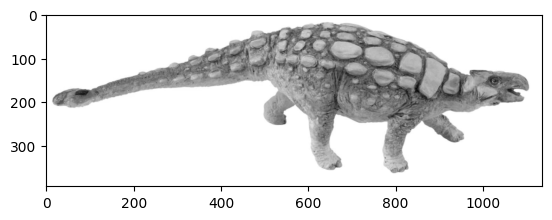

In [4]:
## Read the image using grayscale color
sample_img= cv2.imread("datasets/sample_image_data/ankylosaurus/1.png")
## display the image
sample_img_rgb = cv2.cvtColor(sample_img, cv2.COLOR_BGR2GRAY)
plt.imshow(sample_img_rgb, cmap='gray')

## Resizing and croping
### Importance
. Making instances homogeneous 
. Saving some space
. Removing unwanted scene

('height', 'width', 'color channel')
(471, 410, 3)


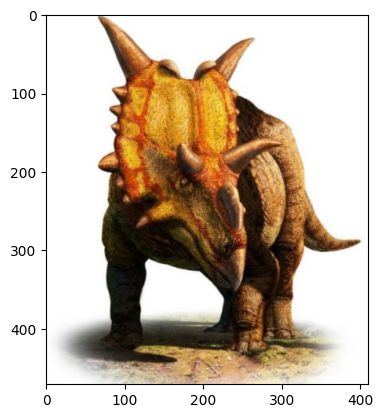

In [5]:
## Lets see the original size (shape) of an image
sample_img = cv2.cvtColor(cv2.imread("datasets/sample_image_data/triceratops/5.png"),cv2.COLOR_BGR2RGB)
plt.imshow(sample_img)
print(("height", "width", "color channel"))
print(sample_img.shape)

(128, 128, 3)


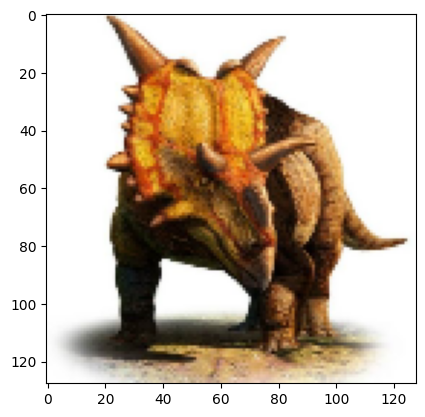

In [6]:

## Resizing the image into a specific shape (ex: (128,128,3))
sample_img_res = cv2.resize(sample_img, (128,128))

print(sample_img_res.shape)
plt.imshow(sample_img_res)

original (457, 338, 3)


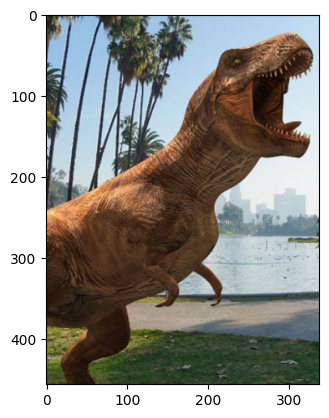

croped (190, 130, 3)


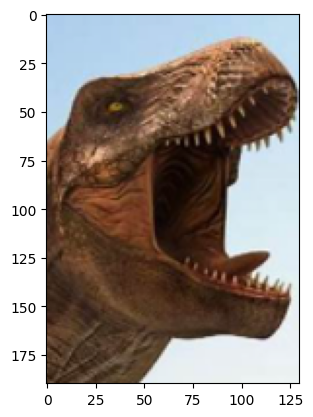

In [7]:
## Cropping
#Slicing portion of an image
sample_img = cv2.cvtColor(cv2.imread("datasets/sample_image_data/trex/5.png"),cv2.COLOR_BGR2RGB)
print("original", sample_img.shape)
plt.imshow(sample_img)
plt.show()

## sample_img_crop = sample_img[start_y: endy, start_x, end_x]
sample_img_crop = sample_img[10:200, 200:330]
print("croped", sample_img_crop.shape)
plt.imshow(sample_img_crop)

## Image normalzation
Sometimes you need to fix the range of pixel intensity values
It helps your model not to be affected by extreme (outlier) color intensity variations of the input images

Min intensity:  0
Max intensity:  255


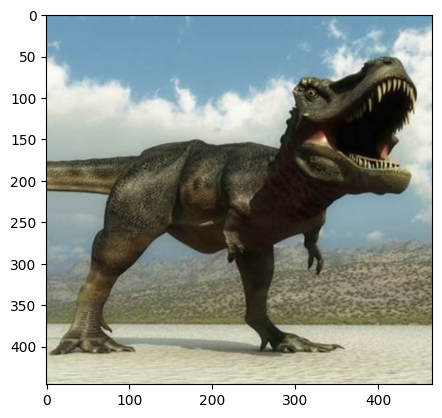

In [8]:
## lets see the intensity of a sample image from our dataset
sample_img = cv2.cvtColor(cv2.imread("datasets/sample_image_data/trex/6.png"),cv2.COLOR_BGR2RGB)
plt.imshow(sample_img)
min_intensity = np.min(sample_img)
max_intensity = np.max(sample_img)
print("Min intensity: ", min_intensity)
print("Max intensity: ", max_intensity)

In [9]:
## Normalizing
norm_img = (sample_img - np.min(sample_img)) / (np.max(sample_img) - np.min(sample_img))

print("After normalization")
min_intensity = np.min(norm_img)
max_intensity = np.max(norm_img)
print("Min intensity: ", min_intensity)
print("Max intensity: ", max_intensity)


After normalization
Min intensity:  0.0
Max intensity:  1.0


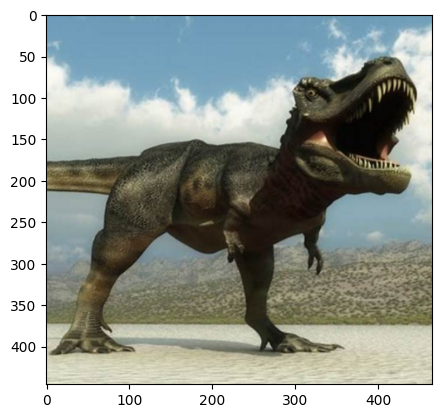

In [10]:
## display normalized image
plt.imshow(norm_img)

## Data augmentation
Increase the size of the dataset and create diversity by creating a transformed version of the original dataset

Tensorflow (A deep learning framework) has most of the augementation functions.

`pip install tensorflow` the `import tensorflow`

For now we directly use opencv's affine transformation techniques.

Later you will se how common augmentations can be used in image data generation during model training

In [14]:
import tensorflow as tf

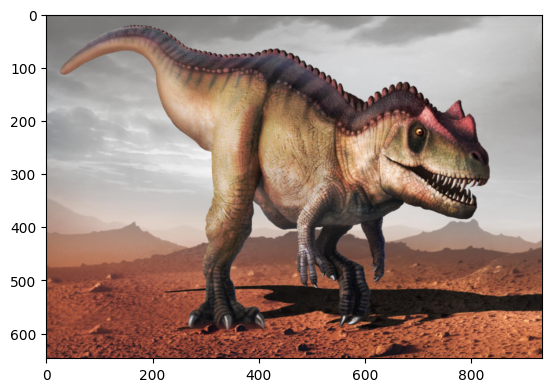

In [15]:
sample_img = cv2.cvtColor(cv2.imread("datasets/sample_image_data/trex/33.png"), cv2.COLOR_BGR2RGB)
plt.imshow(sample_img)

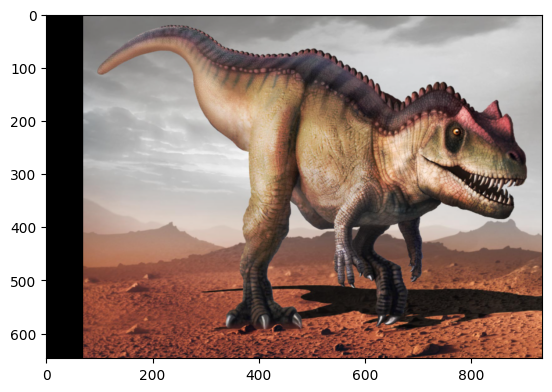

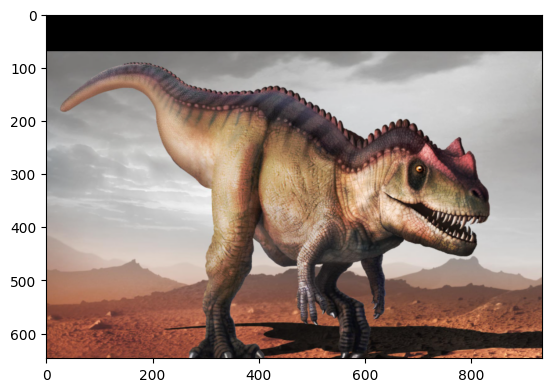

In [16]:
## Translation: shift the position of the image
# translation_matrix = [1.0, 0.0, x_shift, 0.0, 1.0, y_shift, 0.0, 0.0]
horizontal_shift = 70
vertical_shift = 70

# Shift the image horizontally
rows, cols, _ = sample_img.shape
M_horizontal = np.float32([[1, 0, horizontal_shift], [0, 1, 0]])
shifted_horizontal = cv2.warpAffine(sample_img, M_horizontal, (cols, rows))
plt.imshow(shifted_horizontal)
plt.show()
# Shift the image vertically
M_vertical = np.float32([[1, 0, 0], [0, 1, vertical_shift]])
shifted_vertical = cv2.warpAffine(sample_img, M_vertical, (cols, rows))
plt.imshow(shifted_vertical)

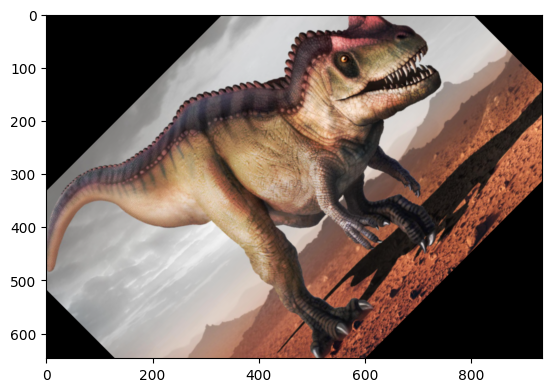

In [17]:
## Totating the image 
rotation_angle = 45
# Get image dimensions
rows, cols, _ = sample_img.shape
# Compute the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), rotation_angle, 1)
# Apply the rotation to the image
rotated_img = cv2.warpAffine(sample_img, rotation_matrix, (cols, rows))
plt.imshow(rotated_img)

shape--->  (323, 467, 3)


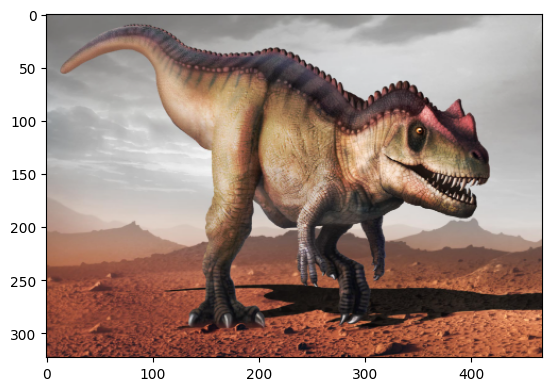

Shape:--->  (970, 1401, 3)


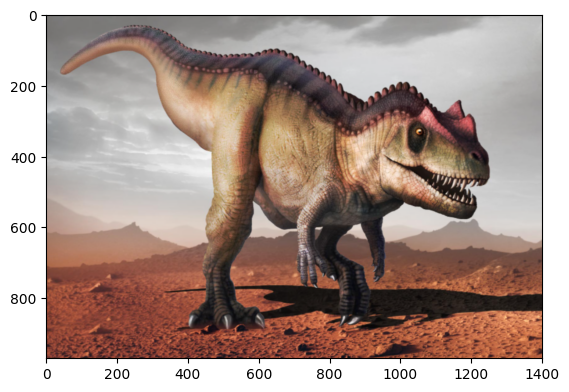

In [18]:
## Scaling an image
# Define the scaling factors
scale_x_1 = 0.5  # Scaling factor for the width
scale_y_1 = 0.5  # Scaling factor for the height

# Calculate the new dimensions after scaling
new_width = int(sample_img.shape[1] * scale_x_1)
new_height = int(sample_img.shape[0] * scale_y_1)

# Perform image scaling
scaled_img = cv2.resize(sample_img, (new_width, new_height))
print("shape---> ",scaled_img.shape)
plt.imshow(scaled_img)
plt.show()

scale_x_2 = 1.5  # Scaling factor for the width
scale_y_2 = 1.5  # Scaling factor for the height

# Calculate the new dimensions after scaling
new_width = int(sample_img.shape[1] * scale_x_2)
new_height = int(sample_img.shape[0] * scale_y_2)

# Perform image scaling
scaled_img = cv2.resize(sample_img, (new_width, new_height))
print("Shape:---> ",scaled_img.shape)
plt.imshow(scaled_img)

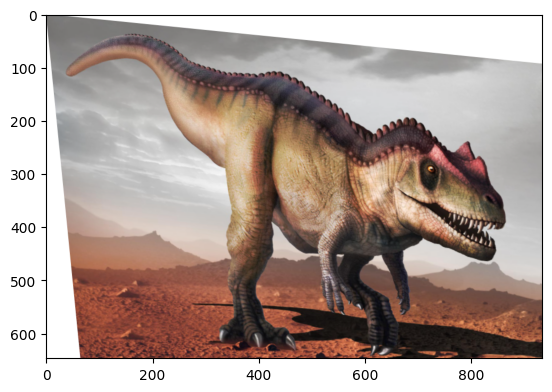

In [19]:
## Shear transformation
# Get image dimensions
rows, cols, _ = sample_img.shape

# Define the shear factors
shear_factor_x = 0.1
shear_factor_y = 0.1

# Define the affine transformation matrix for shear
shear_matrix = np.array([[1, shear_factor_x, 0], [shear_factor_y, 1, 0]])

# Apply the shear transformation using the affine matrix
sheared_img = cv2.warpAffine(sample_img, shear_matrix, (cols, rows), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))
plt.imshow(sheared_img)

Horizontal flip


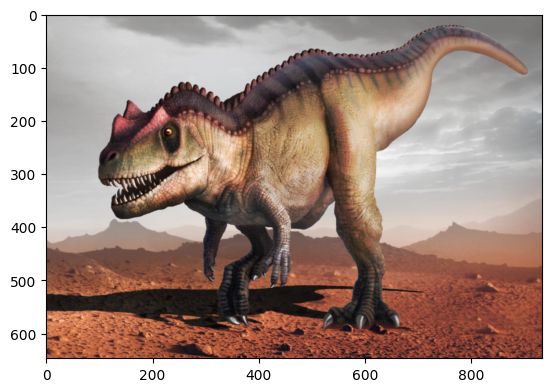

Vertical flip


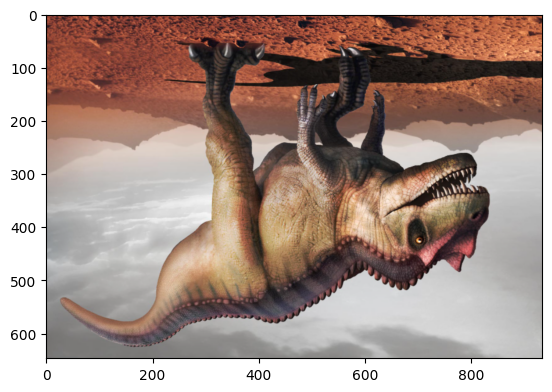

Flip both direction


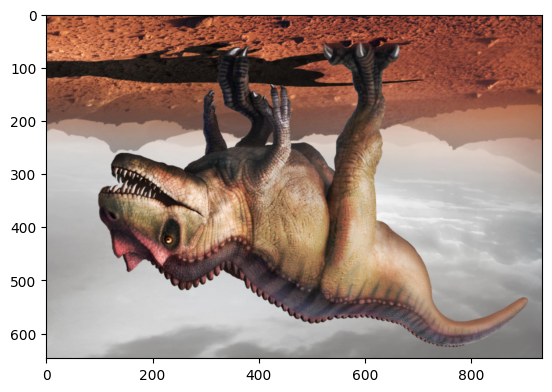

In [20]:
#Flip
# Flip the image horizontally
flipped_horizontal = cv2.flip(sample_img, 1)
print("Horizontal flip")
plt.imshow(flipped_horizontal)
plt.show()
# Flip the image vertically
flipped_vertical = cv2.flip(sample_img, 0)
print("Vertical flip")
plt.imshow(flipped_vertical)
plt.show()
# Flip the image both horizontally and vertically
flipped_both = cv2.flip(sample_img, -1)
print("Flip both direction")
plt.imshow(flipped_both)

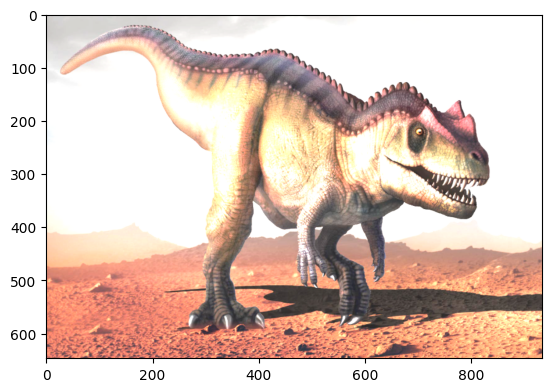

In [21]:
# Adjust contrast and brightness
alpha = 1.5  # Contrast control (1.0 means no change)
beta = 30    # Brightness control (0 means no change)

adjusted_img = cv2.convertScaleAbs(sample_img, alpha=alpha, beta=beta)
plt.imshow(adjusted_img)

<hr>

<img src="images/spoiler_alert.gif" style="width:200px" align="left"/>

### Keras Image data generator
In Keras, the ImageDataGenerator class is a powerful tool for image augmentation. It allows you to perform real-time data augmentation on your image data during model training.

`from tensorflow.keras.preprocessing.image import ImageDataGenerator`

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [23]:
# Create an ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,      # Rotation in degrees
    width_shift_range=0.2,  # Fraction of total width to shift horizontally
    height_shift_range=0.2, # Fraction of total height to shift vertically
    shear_range=0.2,        # Shear intensity (shear angle in radians)
    zoom_range=0.2,         # Range for random zoom
    horizontal_flip=True,   # Randomly flip inputs horizontally
    vertical_flip=True      # Randomly flip inputs vertically
)


In [24]:
## The you can pass the folder if your images so that datagen automatically generate an augmented version of the image
train_data = datagen.flow_from_directory("datasets/sample_image_data", batch_size=4)

Found 200 images belonging to 5 classes.


In [25]:
sample_train_img, sample_train_label =train_data.next() 
## Since the batch size is 4, the datagen process batch of 4 images simultaniously
print("Number of images=",len(sample_train_img),"\n")
print("NUmber of labels=", len(sample_train_label))

Number of images= 4 

NUmber of labels= 4


[0. 1. 0. 0. 0.]


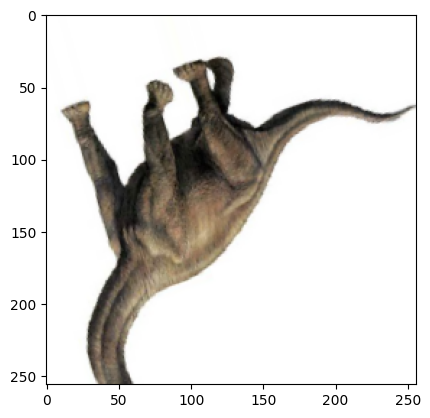

In [26]:
## lets see sample data
print(sample_train_label[0]) ## labels are on hot encoded in order the folders are arranged 
# ankylosaurus  brontosaurus   pterodactly  trex  triceratops
#(Example: [0,0,1,0,0] means the class of the image is  `pterodactly`)
plt.imshow(sample_train_img[0])

##### When you are training your coimputer vission model you can directly use the data generator object sothat the images will be streamed throught Augmentation

### Recape excercise
Perform image data pre-processing on your image dataset

If you have no dataset you can search for it from 

<a href="https://www.kaggle.com">Kaggle</a> 

<a href="https://www.zindi.com">Zindi Africa</a>

##### Make your dataset ready for the training step

In [ ]:
## Start your solution from here

<hr>

<img src='images/bootcamp_icon.png' height="100" width="100" style="float:left"><h1 style="display:inline-block">AI Bootcamp :Applied AI for Research</h1><br>
<i>Image data pre-processing</i><br>
<tt>Author: Mizanu Zelalem</tt>